In [348]:
import cv2
import numpy as np
import math
import sigpy.plot as pl
import matplotlib.pyplot as plt
import zigzag
%matplotlib notebook

In [351]:
def rmse(im_g,im_r):
    return np.sqrt(np.sum(((im_g-im_r)**2))/np.size(im_g))
def minus_inverse(str1):
    str2 = str("")
    for i in range(len(str1)):
        if str1[i] == '0':
            str2 += '1'
        if str1[i] == '1':
            str2 += '0'
    assert len(str2) == len(str1)
    return str2
def num2bits(num):
#     flag = 0
    if num <0:
        st = minus_inverse("{0:b}".format(-num))
#         flag = 1
    else:
        st = "{0:b}".format(num)
    return len(st),st
    
def zig2stream(zig):
    n_z = 0
    results = []
    for i in range(len(zig)):
        if zig[i] != 0:
            if n_z <= 15:
                results.append([hex(n_z)[-1]+hex(num2bits(zig[i])[0])[-1],num2bits(zig[i])[1]])
            else:
                results.append(['f0','-'])
                results.append([hex(n_z-15)[-1]+hex(num2bits(zig[i])[0])[-1],num2bits(zig[i])[1]])
#             results.append(zig[i])
            n_z = 0
        else:
            if i == 0:
                results.append(['00','-'])
            else:
                n_z += 1
    if n_z != 0:
        results.append(['00','-'])
    return results
def stm2len(zig_st):
    re = []
    for i in range(len(zig_st)):
        ka = zig_st[i][0]
        if i == 0:
            try:
                num = dic_DC[ka]
            except:
                num = 8
            if zig_st[i][1][0] == '-':
                re.append([num,0])
            else:
                re.append([num,len(zig_st[i][1])])
        else:
            try:
                num = dic_AC[ka]
            except:
                num = 16
            if zig_st[i][1][0] == '-':
                re.append([num,0])
            else:
                re.append([num,len(zig_st[i][1])])
    return re,np.sum(re)
def rate_calculation(dct,lamda):
    quantimap = np.round(dct/(lamda*quantization))
    quantimap = quantimap.astype(int)
    zig_list = list(zigzag.zigzag(quantimap).astype(int))
    zig_st = zig2stream(zig_list)
    units,num_r = stm2len(zig_st)
    return num_r
def jpeg_rate_distortion(dir_img,lamda):
    quantization = np.array([[16,11,10,16,24,40,51,61],[12,12,14,19,26,58,60,55],[14,13,16,24,40,57,69,56 ],[14,17,22,29,51,87,80,62],[18,22,37,56,68,109,103,77],[24,35,55,64,81,104,113,92],[49,64,78,87,103,121,120,101],[72,92,95,98,112,100,103,99]])
    img = cv2.imread(dir_img, cv2.IMREAD_GRAYSCALE).astype(np.float)-128
    img_shape = img.shape
    img_dct = np.zeros((int(img_shape[0]*img_shape[1]/(8*8)),8,8),dtype=np.float)
    img_dct_all = np.zeros(img_shape)
    img_pitch = np.zeros((int(img_shape[0]*img_shape[1]/(8*8)),8,8),dtype=np.float)
    img_recon = np.zeros(img_shape)
    t = 0
    lam = lamda
    num_bit = 0
    for i in range(0,img_shape[0],8):
        for j in range(0,img_shape[1],8):
    #         print(i,j)
            dct_1 = cv2.dct(img[i:i+8,j:j+8])
            num_bit += rate_calculation(dct_1,lam)
            img_pitch[t,0:8,0:8] = img[i:i+8,j:j+8]
            img_dct_all[i:i+8,j:j+8] = dct_1
            img_dct[t,0:8,0:8] = dct_1
            img_recon[i:i+8,j:j+8] = cv2.idct(np.round(dct_1/(lam*quantization))*(lam*quantization))
            t+=1
    bit_component = num_bit/(img.shape[0]*img.shape[1])
    rmse_1 = rmse(img,np.round(img_recon))
    return img,img_recon,bit_component,rmse_1

In [352]:
im,im_r,bit,re = jpeg_rate_distortion("data/vgt.jpg",100)

In [354]:
re

73.2196790914164

In [349]:
t = 0
lam = 100
num_bit = 0
for i in range(0,img_shape[0],8):
    for j in range(0,img_shape[1],8):
#         print(i,j)
        dct_1 = cv2.dct(img[i:i+8,j:j+8])
        num_bit += rate_calculation(dct_1,lam)
        img_pitch[t,0:8,0:8] = img[i:i+8,j:j+8]
        img_dct_all[i:i+8,j:j+8] = dct_1
        img_dct[t,0:8,0:8] = dct_1
        img_recon[i:i+8,j:j+8] = cv2.idct(np.round(dct_1/(lam*quantization))*(lam*quantization))
        t+=1

In [133]:
def rmse(im_g,im_r):
    return np.sqrt(np.sum(((im_g-im_r)**2))/np.size(im_g))

In [350]:
rmse_1 = rmse(img,np.round(img_recon))
print(rmse_1)

73.2196790914164


<IPython.core.display.Javascript object>


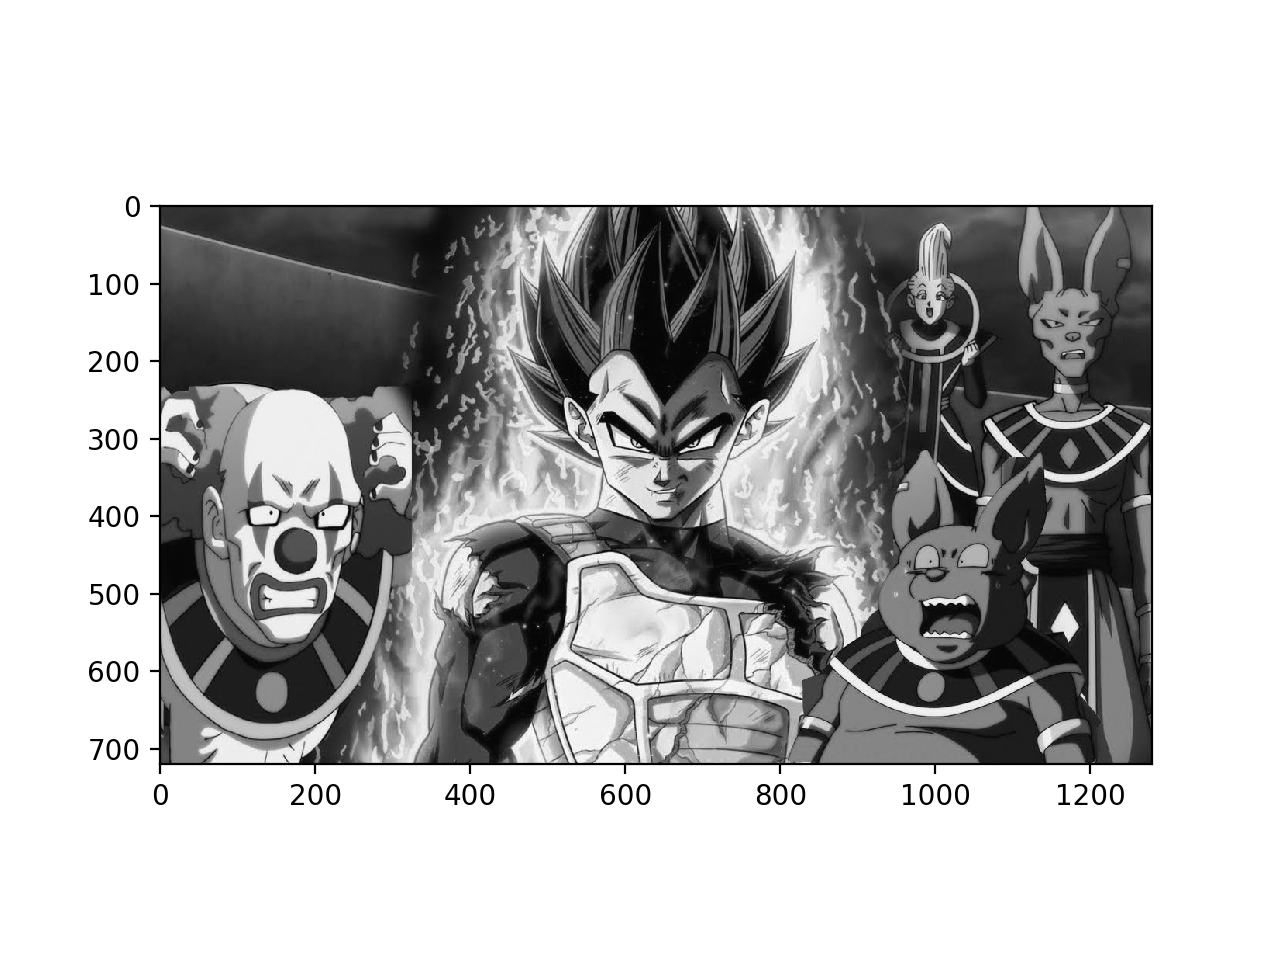

In [155]:
plt.figure()
plt.imshow(img_recon,cmap='gray')
plt.show()

In [176]:
quantimap = np.round(im_exp/quantization)
quantimap = quantimap.astype(int)

In [287]:
dic_dc = json.load(open("dic_dc.txt", 'r'))
dic_ac = json.load(open("dic_ac.txt", 'r'))

In [342]:
import zigzag
def minus_inverse(str1):
    str2 = str("")
    for i in range(len(str1)):
        if str1[i] == '0':
            str2 += '1'
        if str1[i] == '1':
            str2 += '0'
    assert len(str2) == len(str1)
    return str2
def num2bits(num):
#     flag = 0
    if num <0:
        st = minus_inverse("{0:b}".format(-num))
#         flag = 1
    else:
        st = "{0:b}".format(num)
    return len(st),st
    
def zig2stream(zig):
    n_z = 0
    results = []
    for i in range(len(zig)):
        if zig[i] != 0:
            if n_z <= 15:
                results.append([hex(n_z)[-1]+hex(num2bits(zig[i])[0])[-1],num2bits(zig[i])[1]])
            else:
                results.append(['f0','-'])
                results.append([hex(n_z-15)[-1]+hex(num2bits(zig[i])[0])[-1],num2bits(zig[i])[1]])
#             results.append(zig[i])
            n_z = 0
        else:
            if i == 0:
                results.append(['00','-'])
            else:
                n_z += 1
    if n_z != 0:
        results.append(['00','-'])
    return results
def stm2len(zig_st):
    re = []
    for i in range(len(zig_st)):
        ka = zig_st[i][0]
        if i == 0:
            try:
                num = dic_DC[ka]
            except:
                num = 8
            if zig_st[i][1][0] == '-':
                re.append([num,0])
            else:
                re.append([num,len(zig_st[i][1])])
        else:
            try:
                num = dic_AC[ka]
            except:
                num = 16
            if zig_st[i][1][0] == '-':
                re.append([num,0])
            else:
                re.append([num,len(zig_st[i][1])])
    return re,np.sum(re)
def rate_calculation(dct,lamda):
    quantimap = np.round(dct/(lamda*quantization))
    quantimap = quantimap.astype(int)
    zig_list = list(zigzag.zigzag(quantimap).astype(int))
    zig_st = zig2stream(zig_list)
    units,num_r = stm2len(zig_st)
    return num_r

In [316]:
rate_calculation(im_exp)

69

In [300]:
hex(0)[-1]

'0'

In [301]:
num2bits(0)

(1, '0')

In [302]:
zig_st = zig2stream(zig_list)

In [303]:
zig_st

[['06', '010000'],
 ['01', '0'],
 ['02', '10'],
 ['12', '00'],
 ['03', '100'],
 ['03', '011'],
 ['02', '11'],
 ['02', '10'],
 ['31', '0'],
 ['02', '01'],
 ['02', '10'],
 ['01', '0'],
 ['01', '1'],
 ['00', '-']]

In [308]:
len(zig_st[0][1])

6

In [313]:
def stm2len(zig_st):
    re = []
    for i in range(len(zig_st)):
        ka = zig_st[i][0]
        if i == 0:
            num = dic_DC[ka]
            if zig_st[i][1][0] == '-':
                re.append([num,0])
            else:
                re.append([num,len(zig_st[i][1])])
        else:
            num = dic_AC[ka]
            if zig_st[i][1][0] == '-':
                re.append([num,0])
            else:
                re.append([num,len(zig_st[i][1])])
    return re,np.sum(re)

In [314]:
stm2len(zig_st)

([[4, 6],
  [2, 1],
  [2, 2],
  [5, 2],
  [3, 3],
  [3, 3],
  [2, 2],
  [2, 2],
  [6, 1],
  [2, 2],
  [2, 2],
  [2, 1],
  [2, 1],
  [4, 0]],
 69)

In [278]:
ac_s = ac_16.split()

In [282]:
import json

In [202]:
st1 = "{0:b}".format(12131)

In [227]:
def minus_inverse(str1):
    str2 = str("")
    for i in range(len(str1)):
        if str1[i] == '0':
            str2 += '1'
        if str1[i] == '1':
            str2 += '0'
    assert len(str2) == len(str1)
    return str2

In [228]:
str2 = minus_inverse(st1)

In [229]:
type(st1)

str

In [230]:
str(str2)

'01000010011100'

<IPython.core.display.Javascript object>


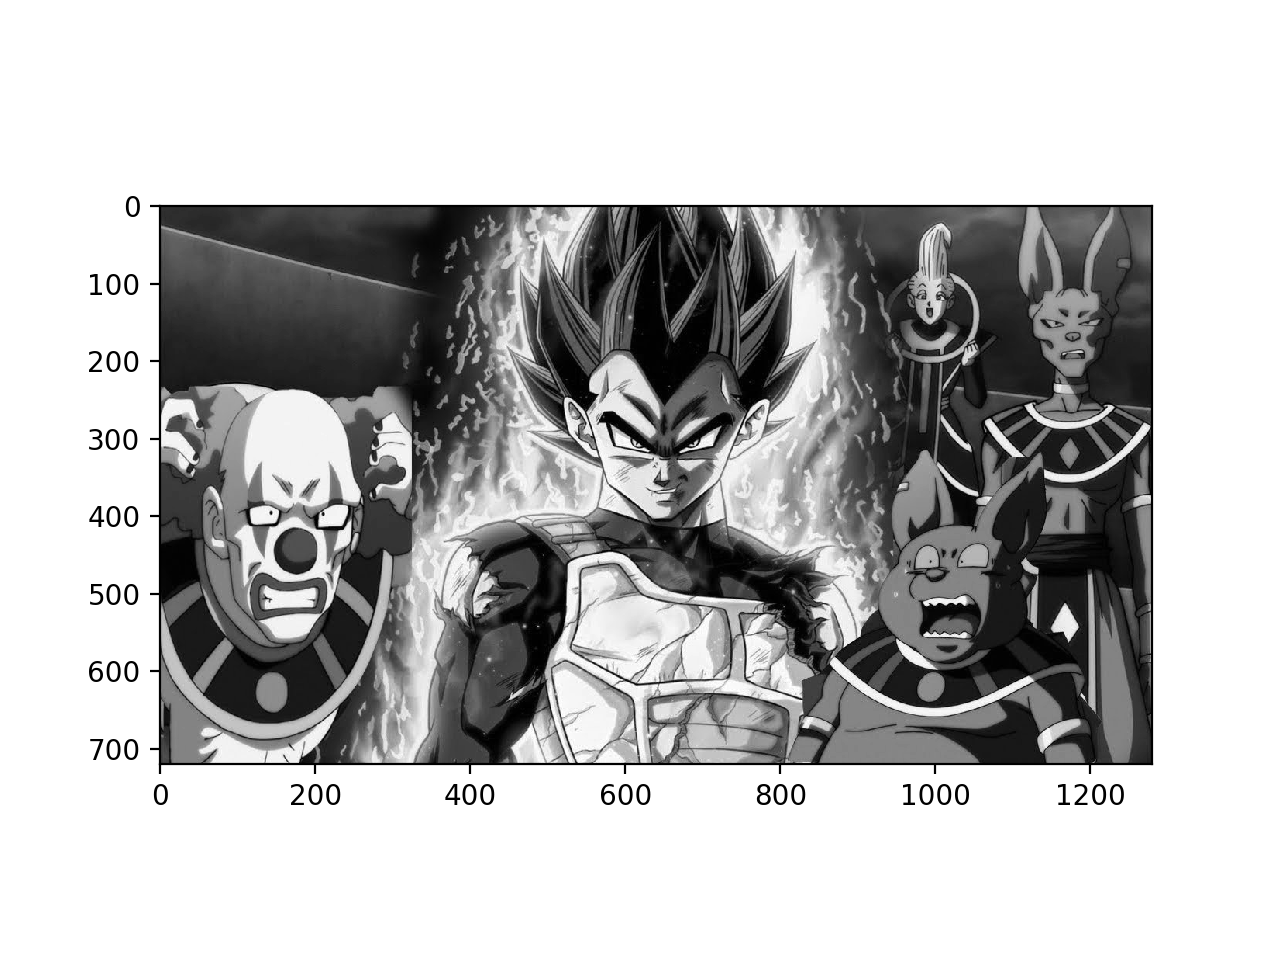

In [13]:
plt.imshow(img,cmap = 'gray')